# Part 1

## (a)

In [1]:
addpath('func/');
dim = 512;

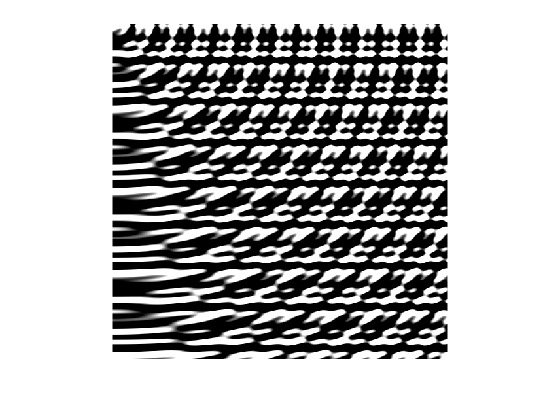

In [2]:
y = meshgrid(1:dim, 1:dim);
x = y';
img1 = sin(0.2 .* x) + sin(0.3 .* x) + cos(0.4 .* x) + ...
    sin(sqrt(x .* x + y .* y) .* 0.15) + sin(sqrt(x .* x + y .* y) .* 0.35);
imshow(img1);

In [3]:
%%file func/vis_fft.m
function [mag, phs] = vis_fft(img)
    fourier = fftshift(fft2(img));
    mag = abs(fourier);
    f = figure;
    imshow(log(mag), []);
    title("Magnitude");
    fourier(mag < 1e-6) = 0;
    phs = angle(fourier);
    f = figure;
    imshow(unwrap(phs), []);
    colormap('gray');
    title("Phase");
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW2/func/vis_fft.m'.


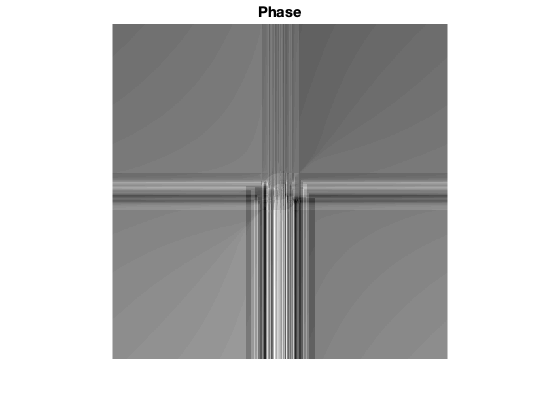

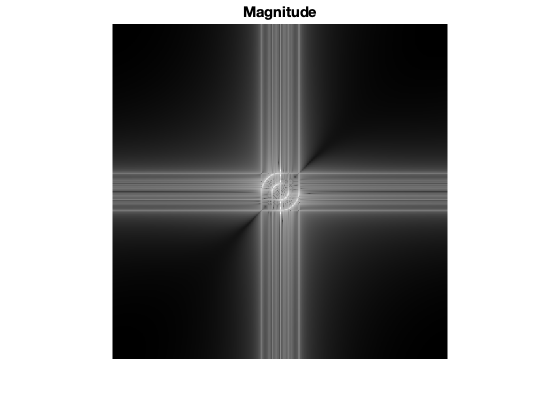

In [4]:
[mag, phs] = vis_fft(img1);

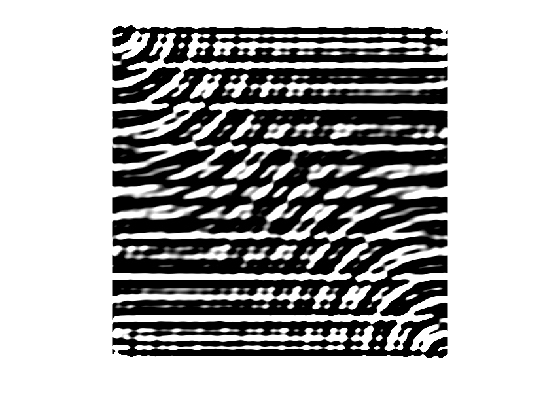

In [5]:
invImg = ifft2(ifftshift(mag) .* 2);
imshow(invImg);

The image shows a mirrored wave at the symmetric side of the original picture.

## (b)

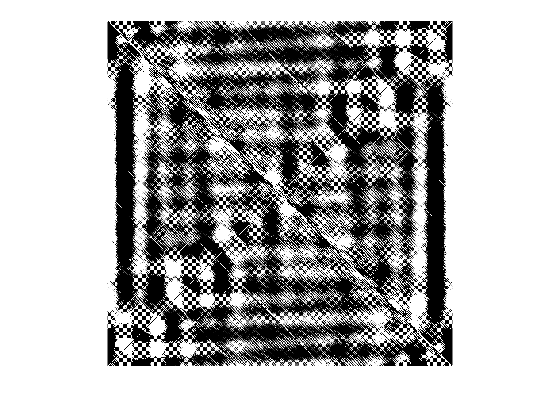

In [17]:
img2 = imread('Cross.jpg');
img2 = im2double(img2);
fourier = fftshift(fft2(img2));
imshow(real(fftshift(fourier)));

# Part 2

In [7]:
%%file func/notch.m
function fimg = notch(img, circSize, kernal, bounds, flag)
    img = img -  mean(img(:));
    fourier = fftshift(fft2(img));
    mag = abs(fourier);
    minVal = min(mag(:));
    maxVal = max(mag(:));
    
    low = maxVal * bounds(1) + minVal * (1 - bounds(1));
    high = maxVal * bounds(2) + minVal * (1 - bounds(2));
    maxMask = ordfilt2(mag, kernal^2, ones(kernal, kernal));
    
    noise = (mag == maxMask) & (mag > low) & (mag < high);
    [w, h] = size(img);
    [r, c] = find(noise);
    noise = zeros(size(fourier));
    for i = 1:length(r)
        if (w-r(i))^2+(h-c(i))^2 > circSize^2
            if r(i) > circSize & c(i) > circSize
                noise(r(i) - circSize:r(i) + circSize, c(i) - circSize:c(i) + circSize) = 1;
            end
        end
    end
    hfy = round((size(noise, 1) + 1) / 2);
    hfx = round((size(noise, 2) + 1) / 2);
    noise(hfy - circSize:hfy + circSize, hfx - circSize:hfx + circSize) = 0;
    fourier(noise > 0) = 0;
    if flag
        f = figure;
        imshow(log(mag), []);
        title('Log Magnitude');
        f = figure;
        imshow(log(maxMask), []);
        title('Max Log Magnitude');
        f = figure;
        imshow(real(log(abs(fourier))), []);
        title('Filtered Magnitude');
    end
    fimg = real(ifft2(fftshift(fourier)));
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW2/func/notch.m'.


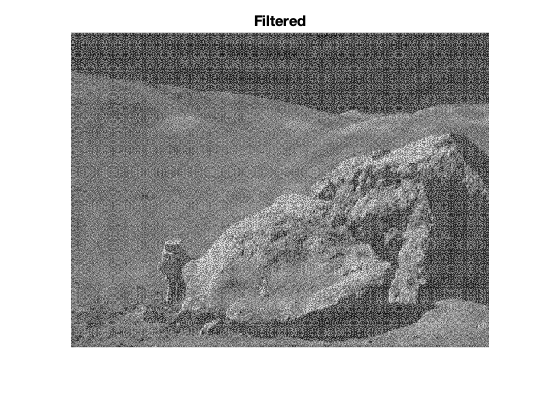

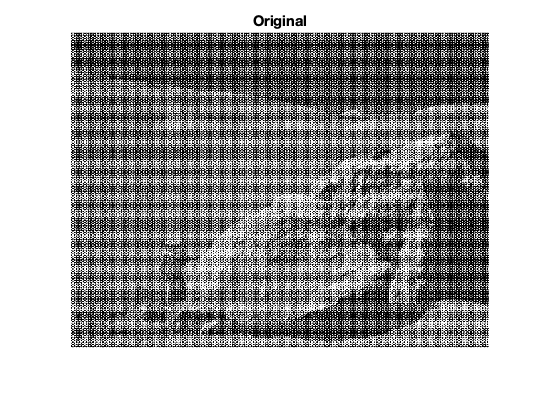

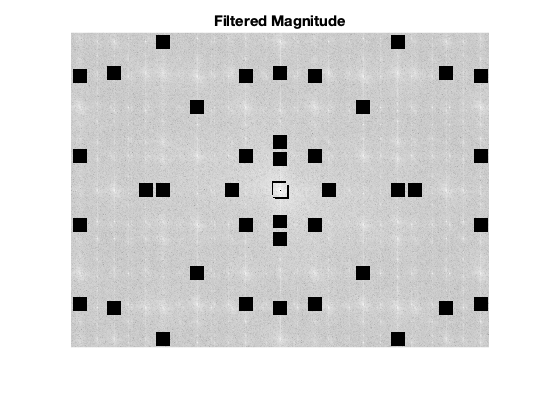

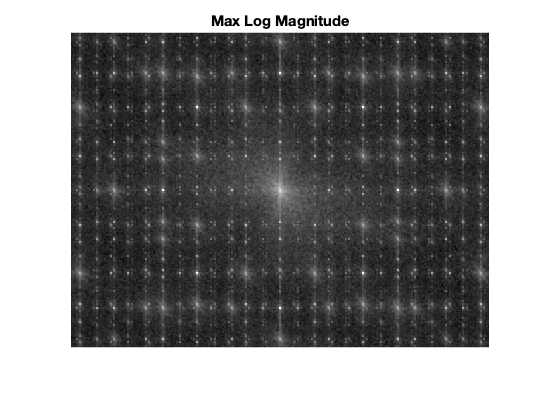

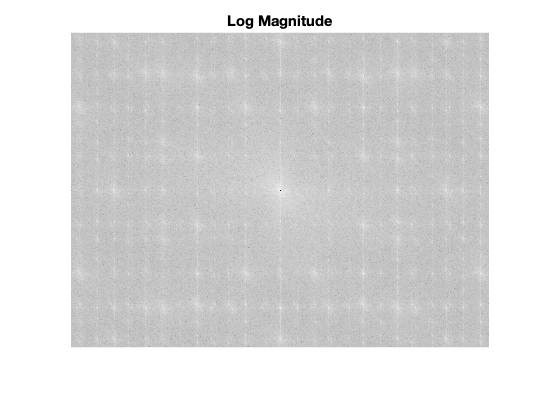

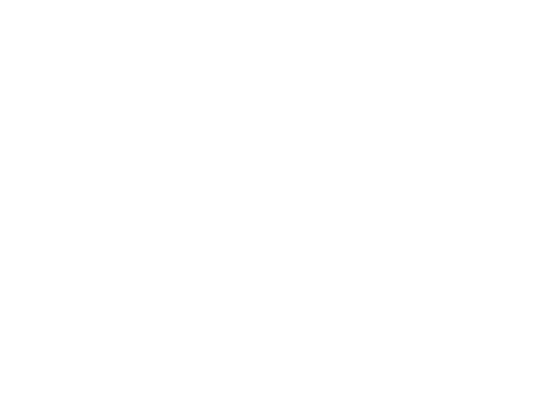

In [8]:
f = figure;
img3 = imread("moonlanding.png");
img3 = im2double(img3);
if size(img3, 3) == 3
    img3 = rgb2gray(img3);
end
fimg = notch(img3, 10, 3, [0.08, 1.01], true);
f = figure;
imshow(img3);
title('Original');
f = figure;
imshow(fimg, []);
title('Filtered');

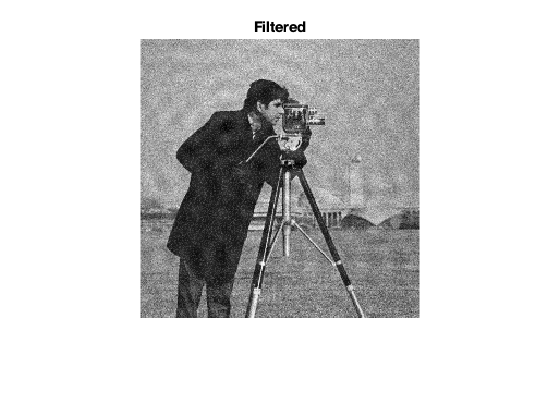

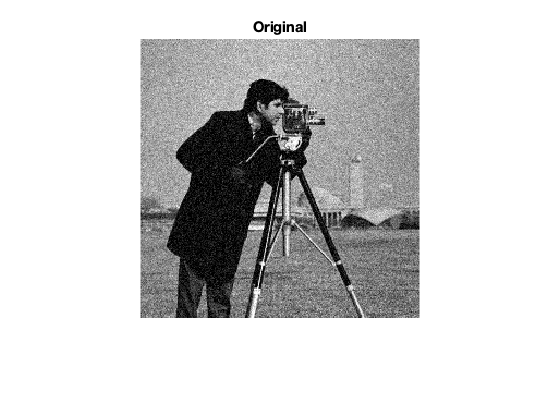

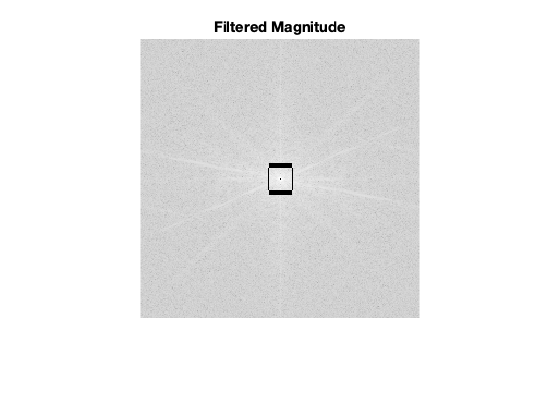

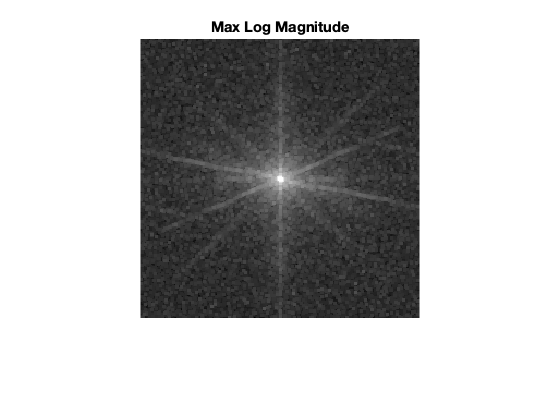

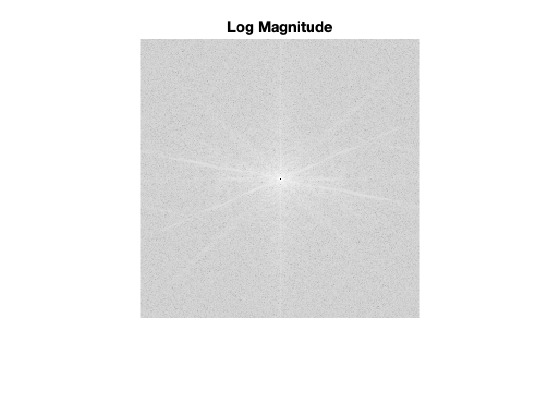

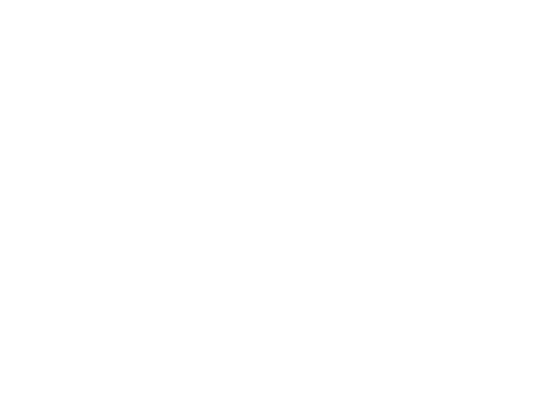

In [21]:
f = figure;
img3 = imread("psnr2.png");
img3 = im2double(img3);
if size(img3, 3) == 3
    img3 = rgb2gray(img3);
end
fimg = notch(img3, 10, 3, [0.2, 1.01], true);
f = figure;
imshow(img3);
title('Original');
f = figure;
imshow(fimg, []);
title('Filtered');

# Part 3

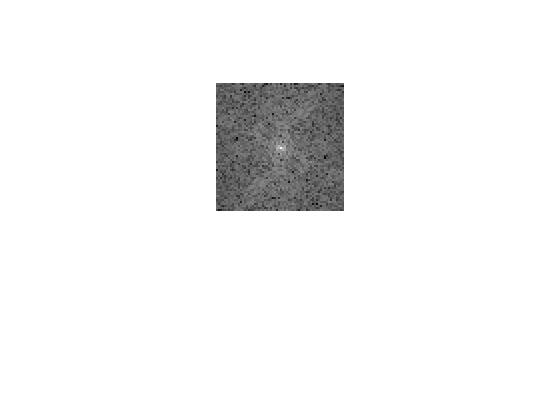

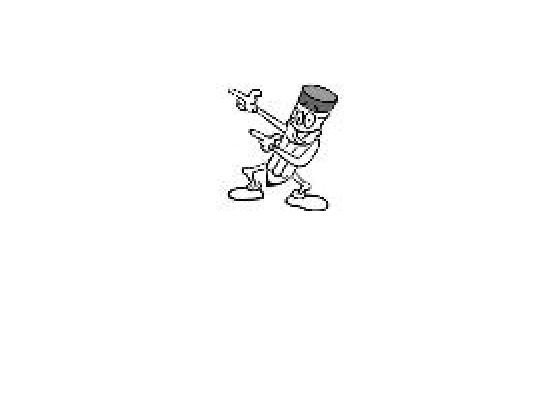

In [10]:
if exist('large.jpg', 'file') ~= 2
    addpath('../HW1/');
    img = imread('CARTOON.jpg');
    img = im2double(img);
    addpath('../HW1/func');
    img = interpo(img, size(img, 1) / 4);
    disp(size(img));
    imwrite(uint8(255 * mat2gray(img)), 'large.jpg');
end
I = imread('large.jpg');
f = figure;
imshow(I);
fourier = fftshift(fft2(I));
f = figure;
imshow(real(log(abs(fourier))), []);

In [11]:
%%file func/padding.m
function I2 = padding(I)
    sz = size(I, 1);
    colPadding = zeros(sz, sz);
    rowPadding = zeros(sz, sz * 2);

    I2 = [I, colPadding];
    I2 = [I2; rowPadding];
end

Created file '/Users/zengs/Documents/Code/VisualComp/HW2/func/padding.m'.


   128   128



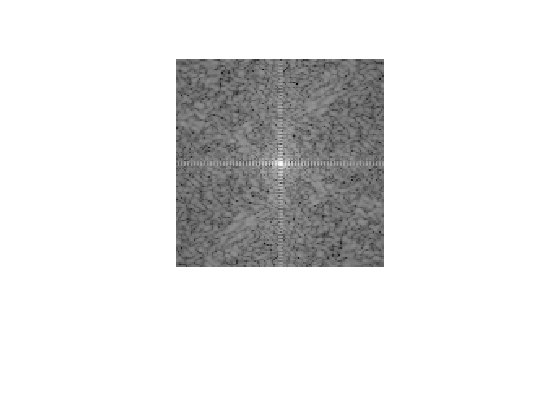

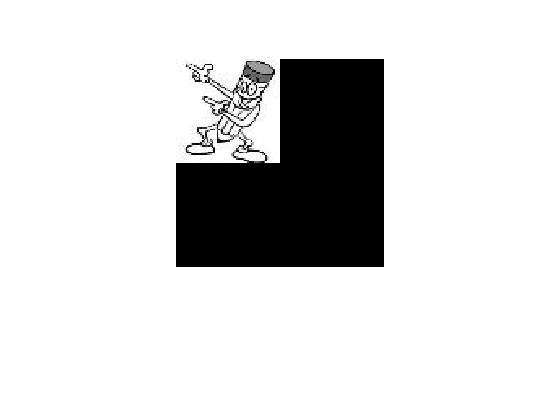

In [12]:
I2 = padding(I);
f = figure;
imshow(I2);
dft2 = fftshift(fft2(I2));
disp(size(I2));
f = figure;
imshow(real(log(abs(dft2))), []);

   256   256



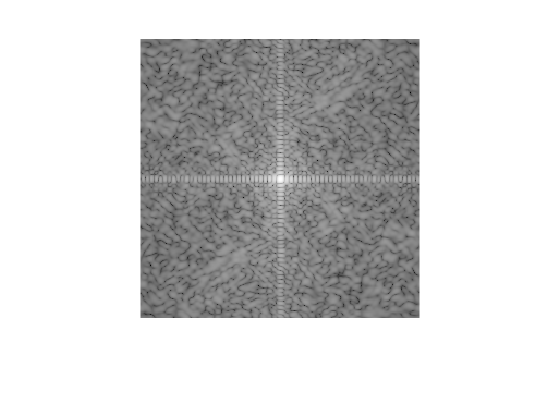

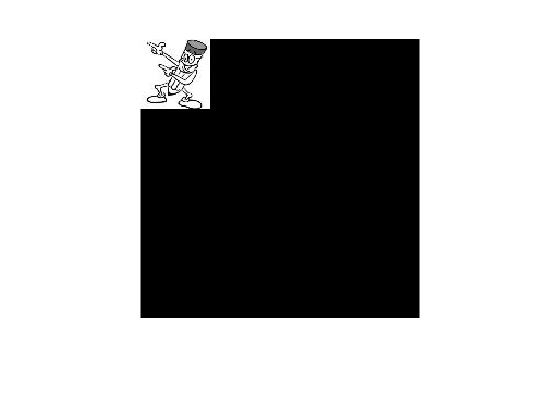

In [13]:
I4 = padding(I2);
f = figure;
imshow(I4);
dft4 = fftshift(fft2(I4));
disp(size(I4));
f = figure;
imshow(real(log(abs(dft4))), []);

   512   512



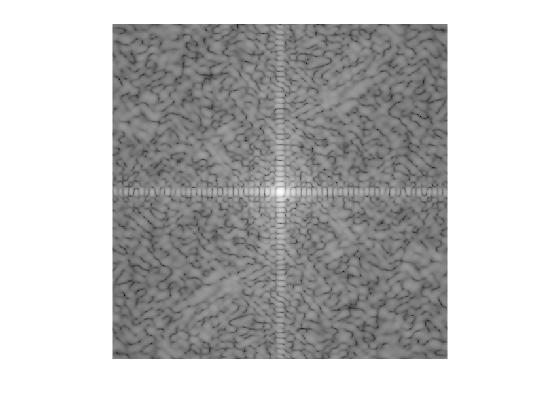

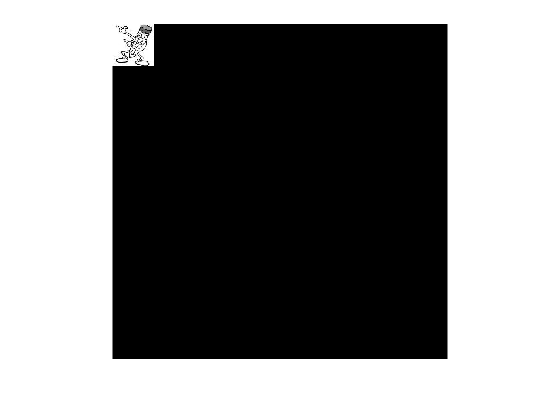

In [14]:
I8 = padding(I4);
f = figure;
imshow(I8);
dft8 = fftshift(fft2(I8));
disp(size(I8));
f = figure;
imshow(real(log(abs(dft8))), []);